# Assignment-2



Instructor- Vahid Hadvi


Submitted by- 

In [1]:
# Importing all usefull libraries

import pandas as pd
import numpy as np

import re
import nltk
import string
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data file
df = pd.read_csv("amazon_one_plus_review.csv")
df.head(2)

,Unnamed: 0,product,product_company,profile_me,review_title,review_rating,review_text,helpful_count,total_comments,review_country,...,url,crawled_at,_id,verified_purchase,color,style_me,size_me,category,sub_category,images
0,0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,...,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,NaN,electronics,mobiles,['https://images-.ssl-images-amazon.com/images...
1,1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,...,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,NaN,NaN,NaN,electronics,mobiles,[]


# Step-1: Pre-processing

In [3]:
#checking the column names
df.columns

Index(['Unnamed: 0', 'product', 'product_company', 'profile_me',
       'review_title', 'review_rating', 'review_text', 'helpful_count',
       'total_comments', 'review_country', 'reviewed_at', 'url', 'crawled_at',
       '_id', 'verified_purchase', 'color', 'style_me', 'size_me', 'category',
       'sub_category', 'images'],
      dtype='object')

Checking out null values and shape of the data

In [4]:
print(df.shape)
df.isnull().sum()

(30612, 21)


Unnamed: 0               0
product                  0
product_company          0
profile_me               0
review_title            25
review_rating            0
review_text              0
helpful_count            0
total_comments           0
review_country           0
reviewed_at              0
url                      0
crawled_at               0
_id                      0
verified_purchase      613
color                 9931
style_me             20930
size_me              19613
category                 0
sub_category             0
images                   0
dtype: int64

Dropping the columns having the maximum null values ('color', 'style_me', 'size_me') so that numbers of samples do not decrease. 

In [5]:
df = df.drop(['color', 'style_me', 'size_me'], axis=1)
df

,Unnamed: 0,product,product_company,profile_me,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,category,sub_category,images
0,0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,8/4/2020 0:00,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,electronics,mobiles,['https://images-.ssl-images-amazon.com/images...
1,1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,8/3/2020 0:00,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,electronics,mobiles,[]
2,2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5.0 out of 5 stars,\n An amazing phone!,322 people found this helpful,1,India,8/4/2020 0:00,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase,electronics,mobiles,['https://images-.ssl-images-amazon.com/images...
3,3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5.0 out of 5 stars,\n Brilliant..,243 people found this helpful,7,India,8/2/2020 0:00,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,76f68b53-5c52-56b2-9727-a5ab8c4bb4ff,Verified Purchase,electronics,mobiles,['https://images-.ssl-images-amazon.com/images...
4,4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5.0 out of 5 stars,\n I was skeptical about changing from One pl...,109 people found this helpful,2,India,8/4/2020 0:00,https://www.amazon.in/product-reviews/B08695ZS...,10/18/2020 11:23,22228681-b884-56a1-b04e-87167f6f76e6,Verified Purchase,electronics,mobiles,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30607,30607,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,rakesh,Great but not satisfied for me,2.0 out of 5 stars,\n Quality of phone is great but from my pers...,0,0,India,9/3/2020 0:00,https://www.amazon.in/product-reviews/B077Q7GW...,10/18/2020 17:37,5b17d02b-9a14-5802-8523-c9835f923bd5,Verified Purchase,electronics,mobiles,[]
30608,30608,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Amazon Customer,Not recommend,2.0 out of 5 stars,\n Not recommend\n,0,0,India,5/20/2020 0:00,https://www.amazon.in/product-reviews/B077Q7GW...,10/18/2020 17:37,633b24b0-89ed-5ba6-b651-09eef6c2aa44,Verified Purchase,electronics,mobiles,[]
30609,30609,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,SREEKUMAR V,WORST MARKETING TACTICS OF FLASH SALE OF REDMI...,2.0 out of 5 stars,\n Redmi and Amazon is engaged in a worst mar...,3 people found this helpful,0,India,6/29/2020 0:00,https://www.amazon.in/product-reviews/B077Q7GW...,10/18/2020 17:37,961649c7-ab01-5e9b-8c09-ab9e8a1e6c6d,NaN,electronics,mobiles,[]
30610,30610,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Abhishek M.,Display retention issue,2.0 out of 5 stars,"\n I am facing display retention problem, aft...",0,0,India,4/26/2020 0:00,https://www.amazon.in/product-reviews/B077Q7GW...,10/18/2020 17:37,bd56d1dc-016b-5671-ae3f-ad2529dbe0b2,NaN,electronics,mobiles,[]


Checking out again the null values.

In [6]:
df.isnull().sum()

Unnamed: 0             0
product                0
product_company        0
profile_me             0
review_title          25
review_rating          0
review_text            0
helpful_count          0
total_comments         0
review_country         0
reviewed_at            0
url                    0
crawled_at             0
_id                    0
verified_purchase    613
category               0
sub_category           0
images                 0
dtype: int64

Dropping samples to remove null values

In [7]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0           0
product              0
product_company      0
profile_me           0
review_title         0
review_rating        0
review_text          0
helpful_count        0
total_comments       0
review_country       0
reviewed_at          0
url                  0
crawled_at           0
_id                  0
verified_purchase    0
category             0
sub_category         0
images               0
dtype: int64

Null Values are removed entirely

Dropping unneccessory columns to reduce dimensions and making data effective for insights

In [8]:
#Droping extra unneccessory columns
df = df.drop(['Unnamed: 0', 'helpful_count', 'reviewed_at', 'url', 'crawled_at', 'sub_category', 'images',
              "profile_me", "verified_purchase", "category", "_id"], axis=1)
df.head()

,product,product_company,review_title,review_rating,review_text,total_comments,review_country
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",3,India
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",1,India
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Great price!,5.0 out of 5 stars,\n An amazing phone!,1,India
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Beast in OnePlus.,5.0 out of 5 stars,\n Brilliant..,7,India
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Changed to Nord from 6t,5.0 out of 5 stars,\n I was skeptical about changing from One pl...,2,India


In [9]:
df.shape

(29974, 7)

Replacing review rating with single numeric value

In [10]:
reviews = df['review_rating']
reviews.head()

0    5.0 out of 5 stars
1    5.0 out of 5 stars
2    5.0 out of 5 stars
3    5.0 out of 5 stars
4    5.0 out of 5 stars
Name: review_rating, dtype: object

In [11]:
reviews = reviews.replace('5.0 out of 5 stars', '5')
reviews = reviews.replace('4.0 out of 5 stars', '4')
reviews = reviews.replace('3.0 out of 5 stars', '3')
reviews = reviews.replace('2.0 out of 5 stars', '2')
reviews = reviews.replace('1.0 out of 5 stars', '1')
df['review_rating'] = reviews
df.head()

,product,product_company,review_title,review_rating,review_text,total_comments,review_country
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,*Read before you buy!!*,5,"\n Yea..pre-ordered on 28 July, got it on 4 A...",3,India
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Near to mid range Perfection,5,"\n Got it delivered yesterday , used for abou...",1,India
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Great price!,5,\n An amazing phone!,1,India
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Beast in OnePlus.,5,\n Brilliant..,7,India
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Changed to Nord from 6t,5,\n I was skeptical about changing from One pl...,2,India


Taking insight from prepared data and ploting some graphs for visuals

Source for line plot using seaborn library: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [12]:
review_rating = df['review_rating']
review_country = df['review_country']

val_1 = df["product_company"]
val_1 = pd.DataFrame(val_1)
val_1['review_country'] = review_country
val_1['review_rating'] = review_rating
val_1.sample(2)

,product_company,review_country,review_rating
12551,Redmi,India,5
15904,Redmi,India,4


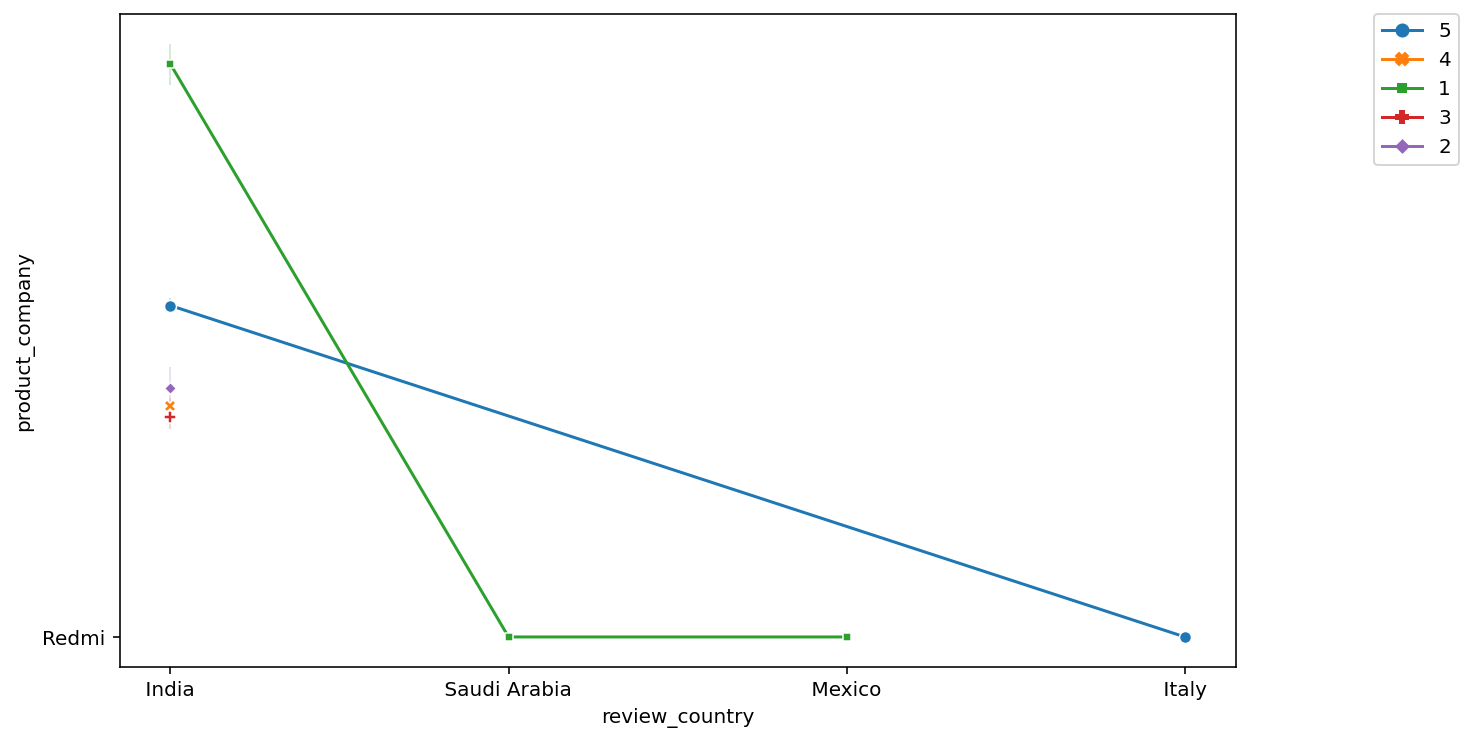

In [13]:
sns.lineplot(data=val_1, x="review_country", y="product_company",
             hue= "review_rating", style="review_rating", markers=True, dashes=False)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)

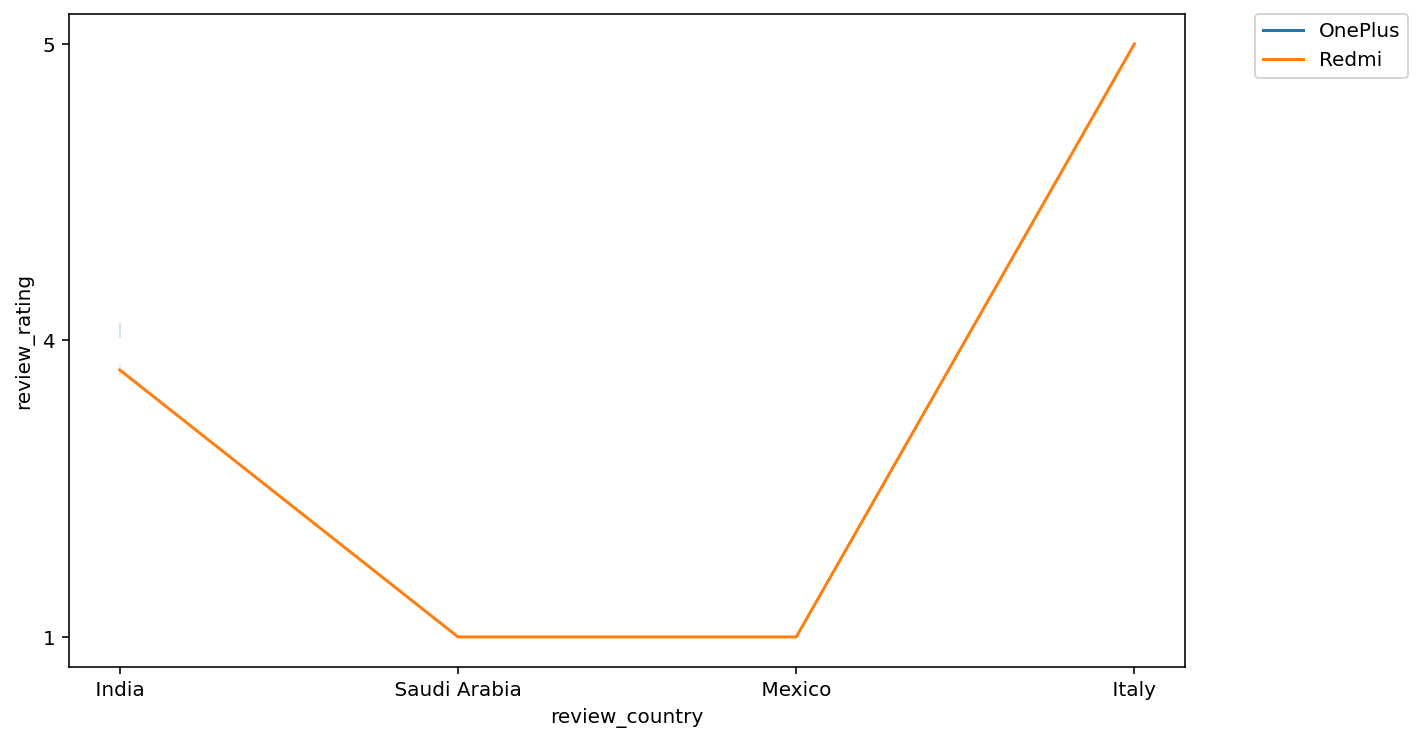

In [14]:
sns.lineplot(data=val_1, x="review_country", y="review_rating", hue="product_company")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)

In [15]:
df.sample(5)

,product,product_company,review_title,review_rating,review_text,total_comments,review_country
5628,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,The camera is too worst except camera everythi...,4,\n The camera is too worst except camera ever...,0,India
22242,"Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...",Redmi,Disappointing Phone (Read full review),2,\n Hardware Quality = Super Awesome,0,India
2537,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Good phone,5,\n Nice\n,0,India
3762,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Best,5,\n Good phone\n,0,India
730,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Value for money mobile,5,"\n Superb phone for everything camera, design...",0,India


Source for cleaning and tokenizing the text: https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training/welcome?u=56968457

In [16]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
   
    text = [word for word in tokens if word not in stopwords]
    return text


In [17]:
df["product"] = df["product"].apply(lambda x: remove_punct(x))
df["review_text"] = df["review_text"].apply(lambda x: remove_punct(x))
df["review_title"] = df["review_title"].apply(lambda x: remove_punct(x))

df.head(2)

,product,product_company,review_title,review_rating,review_text,total_comments,review_country
0,OnePlus Nord 5G Gray Onyx 8GB RAM 128GB Storage,OnePlus,Read before you buy,5,\n Yeapreordered on 28 July got it on 4 Augus...,3,India
1,OnePlus Nord 5G Gray Onyx 8GB RAM 128GB Storage,OnePlus,Near to mid range Perfection,5,\n Got it delivered yesterday used for about...,1,India


In [18]:
df["product"] = df["product"].apply(lambda x: clean_text(x))
df["review_text"] = df["review_text"].apply(lambda x: clean_text(x))
df["review_title"] = df["review_title"].apply(lambda x: clean_text(x))

df.head(2)

,product,product_company,review_title,review_rating,review_text,total_comments,review_country
0,"[oneplus, nord, 5g, gray, onyx, 8gb, ram, 128g...",OnePlus,"[read, buy]",5,"[, yeapreordered, 28, july, got, 4, august, pa...",3,India
1,"[oneplus, nord, 5g, gray, onyx, 8gb, ram, 128g...",OnePlus,"[near, mid, range, perfection]",5,"[, got, delivered, yesterday, used, 56, hours,...",1,India


Source for applying model and sentimental analysis: https://cnvrg.io/sentiment-analysis-python/?gclid=CjwKCAjw9r-DBhBxEiwA9qYUpTTOpoHF_0Hn_9b-IEB7Dr0E-9UKoJkh8ISeBP126QlC0EqhUwq4xBoC9a4QAvD_BwE

In [19]:
df['review_rating'].value_counts()

5    13709
4     8443
3     4051
1     1984
2     1787
Name: review_rating, dtype: int64

In [20]:
df['Length'] = df['review_text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

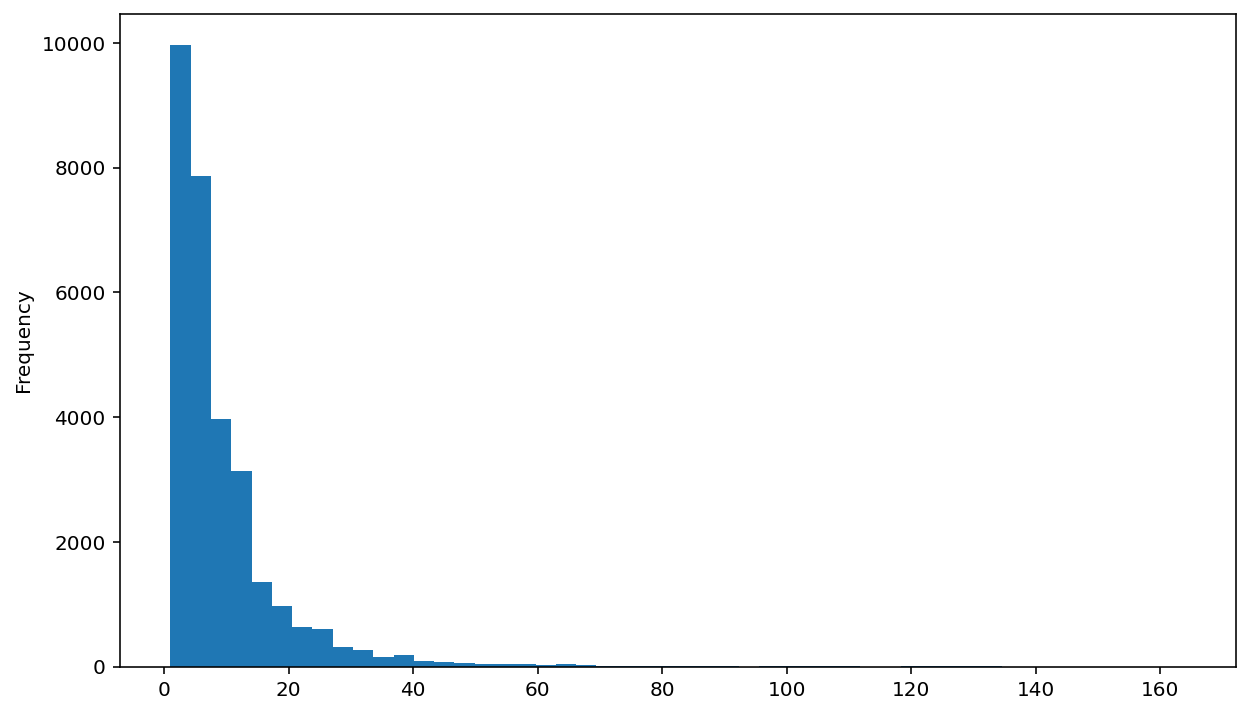

In [21]:
df['Length'].plot(kind = 'hist' , bins = 50) 

Text(0.5, 0.98, 'Length via each review_rating')

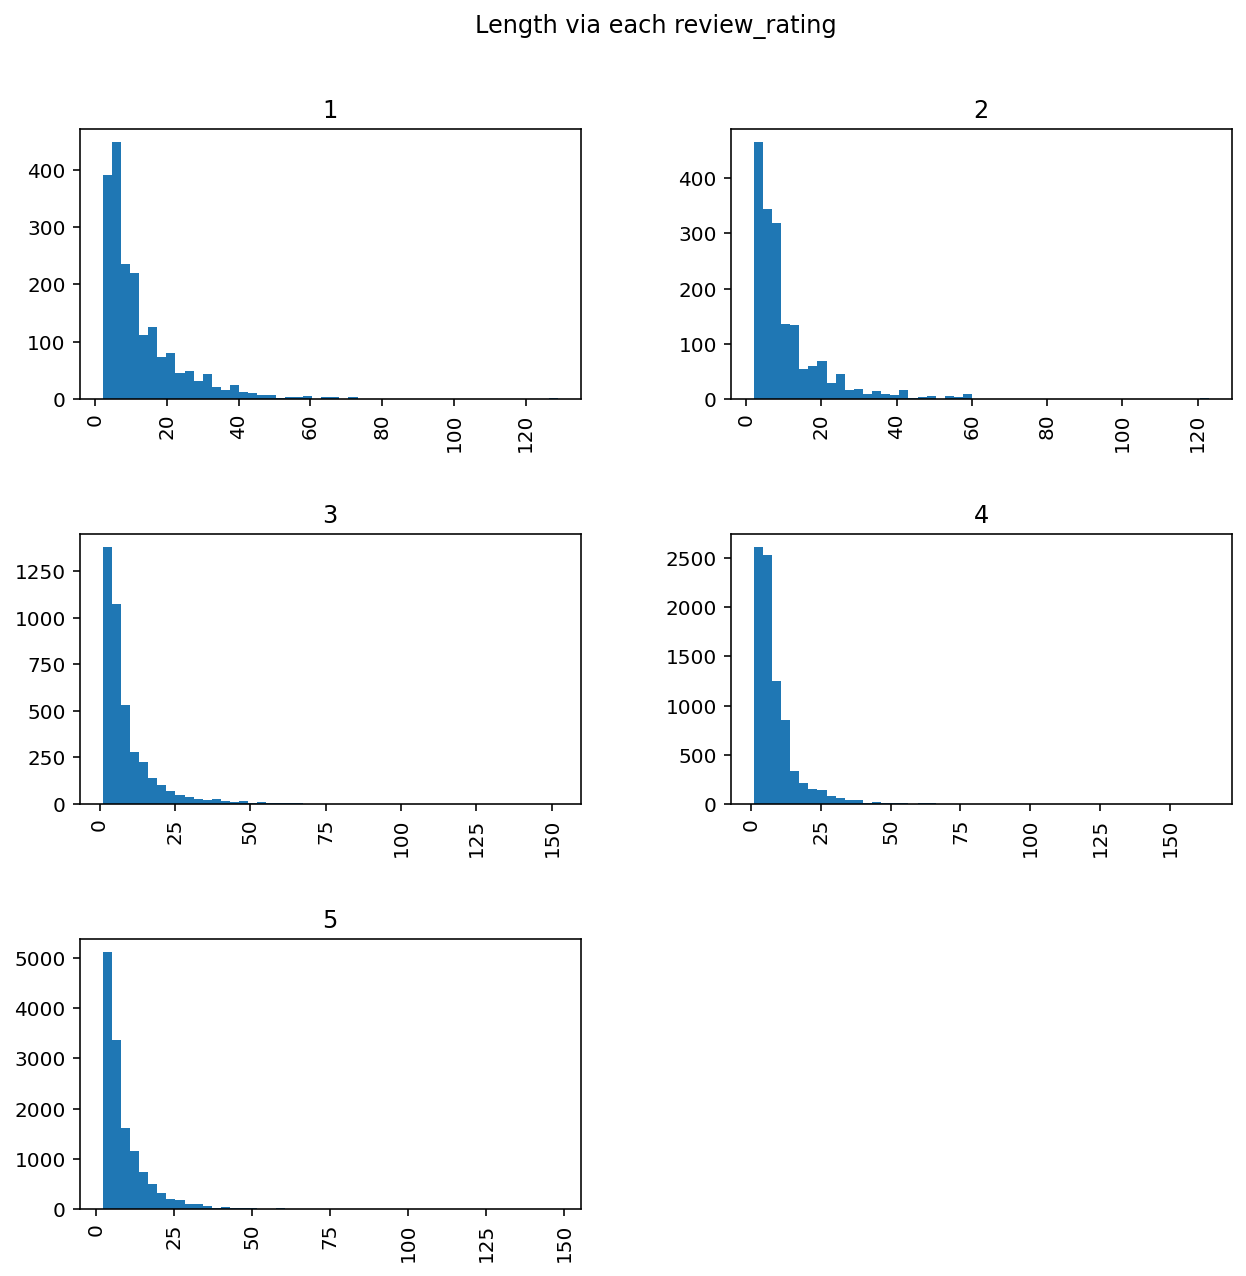

In [22]:
ax = df.hist(column = 'Length', by = 'review_rating', bins = 50 , figsize = (10,10));
pl.suptitle('Length via each review_rating')

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(analyzer=clean_text)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [26]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# Step-2: Applying Model

In [27]:
pipeline.fit(df['review_text'], df['review_rating']) 

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x0000007CC7F459D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [28]:
pipeline.score(df['review_text'], df['review_rating'])

0.6763862013745245

In [29]:
from sklearn.metrics import classification_report

all_predictions = pipeline.predict(df['review_text'])
print(classification_report(df['review_rating'], all_predictions))

              precision    recall  f1-score   support

           1       0.77      0.02      0.04      1984
           2       0.00      0.00      0.00      1787
           3       0.64      0.06      0.11      4051
           4       0.92      0.76      0.84      8443
           5       0.60      0.99      0.75     13709

    accuracy                           0.68     29974
   macro avg       0.59      0.37      0.34     29974
weighted avg       0.67      0.68      0.59     29974

